In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
df = pd.read_csv('weather_classification_data.csv')

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# Understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [6]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

#### Hence no data cleaning required since there are no missing entries

# Exploratory Data Analysis (EDA)

In [7]:
df.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Going through the categorical variables: Cloud cover, Season, Location, Weather type

In [8]:
df['Cloud Cover'].value_counts()

overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: Cloud Cover, dtype: int64

In [9]:
df['Season'].value_counts()

Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: Season, dtype: int64

In [10]:
df['Location'].value_counts()

inland      4816
mountain    4813
coastal     3571
Name: Location, dtype: int64

In [11]:
# Sorting out the categorical coloumns and the numerical coloumns
numeric_cols =df.select_dtypes(include=['number']).columns
categorical_cols =df.select_dtypes(include=['object']).columns

In [12]:
numeric_cols

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

In [13]:
categorical_cols

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')

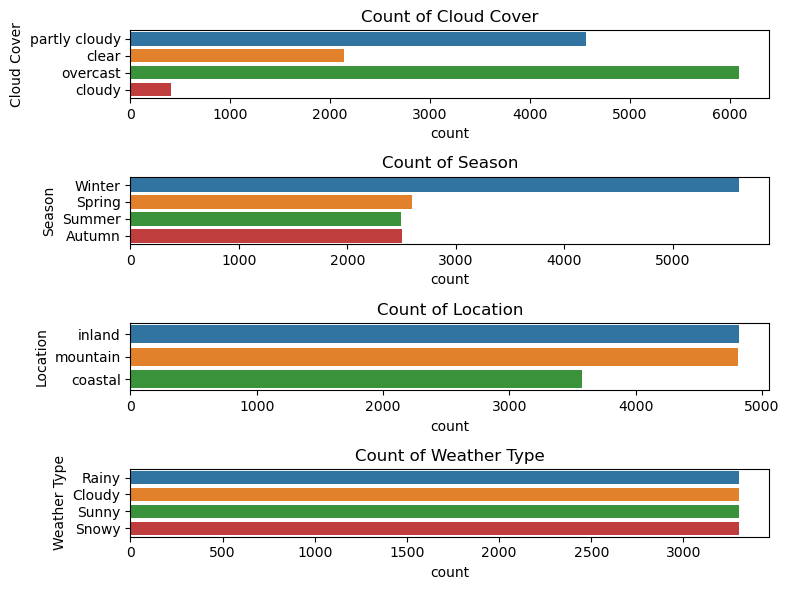

In [14]:
# Countplot for all the categorical Factors

fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(8,6))

for i,column in enumerate(categorical_cols):
    sns.countplot(y=df[column],ax=axes[i])
    axes[i].set_title(f'Count of {column}')
    
plt.tight_layout()

### Going through the numerical columns

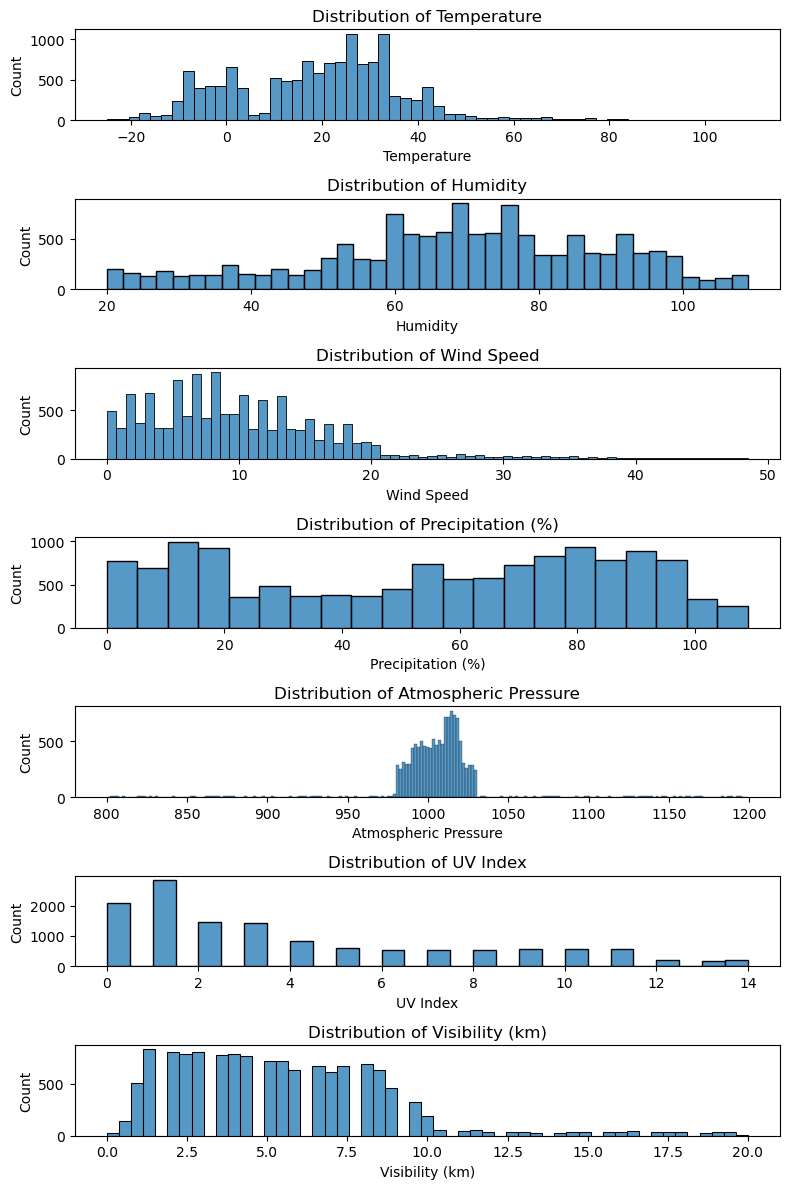

In [15]:
# Distribution for all the numerical coloumns

fig,axes = plt.subplots(nrows=len(numeric_cols),ncols=1,figsize=(8,12))

for i, column in enumerate(numeric_cols):
    sns.histplot(df[column],ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()

### Some more visualizations

Text(0.5, 1.0, 'Temperatures across different location type')

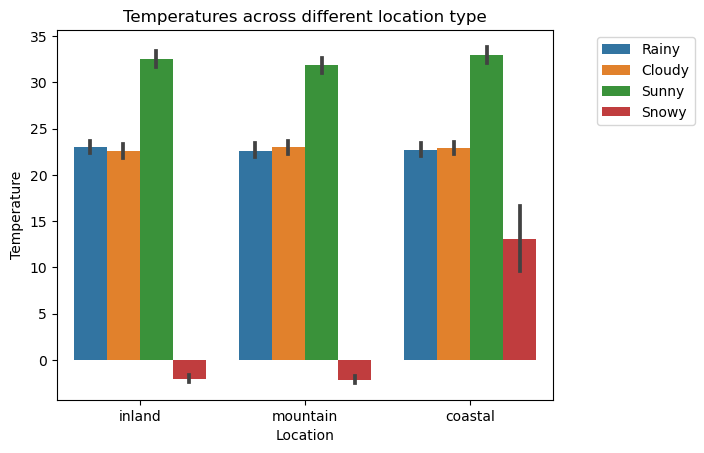

In [16]:
plt.plot(figsize=(6,6))
sns.barplot(data = df, x='Location',y='Temperature',hue='Weather Type')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')
plt.title('Temperatures across different location type')

Text(0.5, 1.0, 'Temperature across different seasons')

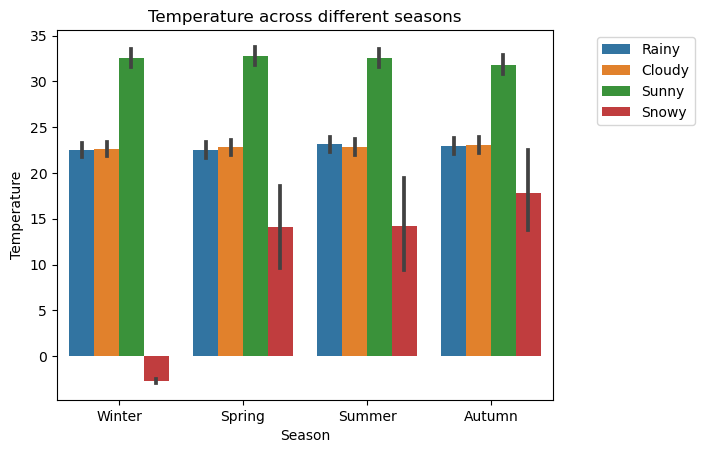

In [17]:
plt.plot(figsize=(6,6))
sns.barplot(data = df, x='Season',y='Temperature',hue='Weather Type')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')
plt.title('Temperature across different seasons')

Text(0.5, 1.0, 'Level of temperatures across different type of cloud cover')

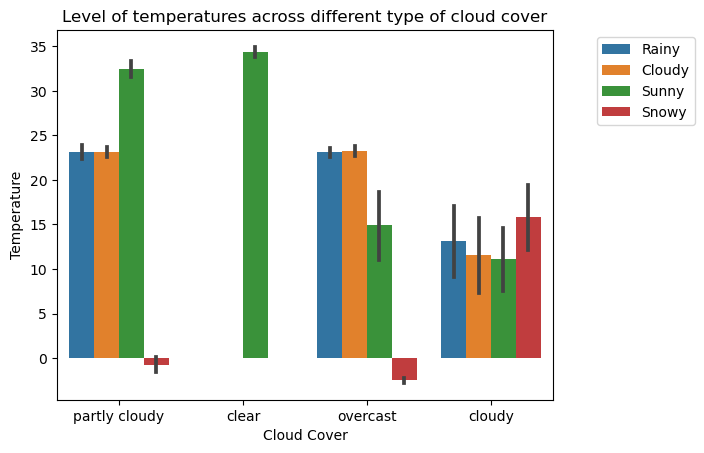

In [18]:
plt.plot(figsize=(6,6))
sns.barplot(data = df, x='Cloud Cover',y='Temperature',hue='Weather Type')
plt.legend(bbox_to_anchor=(1.3,1),loc='upper right')
plt.title('Level of temperatures across different type of cloud cover')

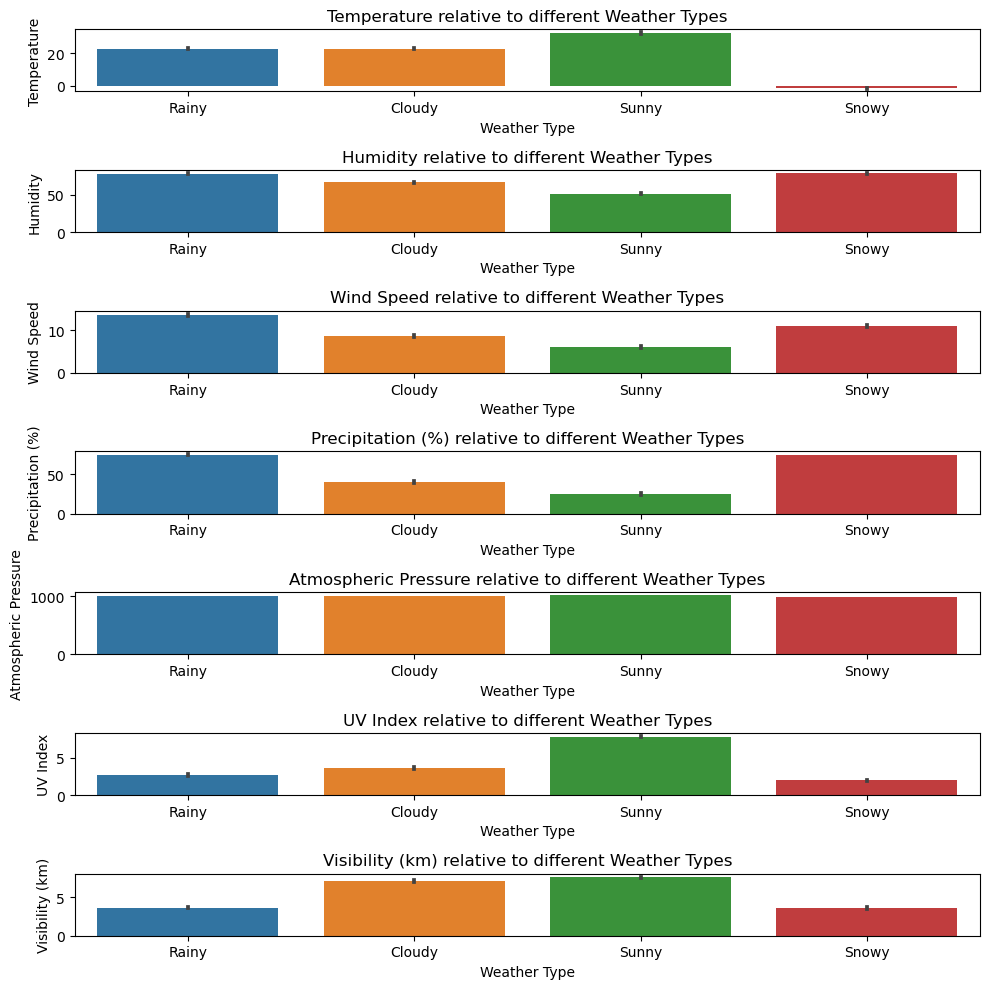

In [19]:
fig,axes = plt.subplots(nrows=len(numeric_cols),ncols=1,figsize=(10,10))

for i,row in enumerate(numeric_cols):
    sns.barplot(x=df['Weather Type'],y=df[row],ax=axes[i])
    axes[i].set_title(f'{row} relative to different Weather Types')

plt.tight_layout()

### Let us see how changes in UV Index affects the average temperature

Text(0.5, 1.0, 'Affect on average temperature due to UV Index')

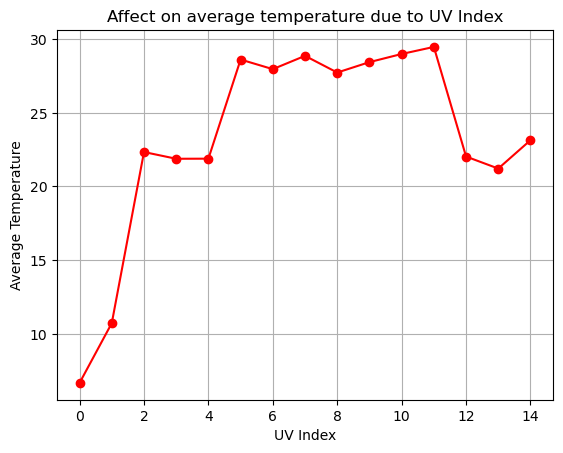

In [20]:
UT = df.groupby('UV Index')['Temperature'].mean()
UT.plot(kind='line',marker='o',color='red')
plt.grid(True)
plt.xlabel('UV Index')
plt.ylabel('Average Temperature')
plt.title('Affect on average temperature due to UV Index')

### Let us see how changes in Humidity levels affect the average visibility

Text(0, 0.5, 'Average Average Visibility')

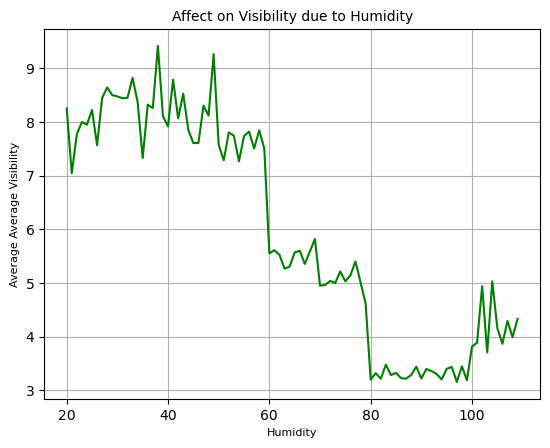

In [21]:
VH = df.groupby('Humidity')['Visibility (km)'].mean()
VH.plot(kind='line',color='green')
plt.title('Affect on Visibility due to Humidity',fontsize=10)
plt.grid(True)
plt.xlabel('Humidity',fontsize=8)
plt.ylabel('Average Average Visibility',fontsize=8)

### Let us see how changes in Precipitation levels affect the average Atmospheric Pressure

Text(0.5, 1.0, 'Affect on Average Atmospheric Pressure due to changes in Precipitation level')

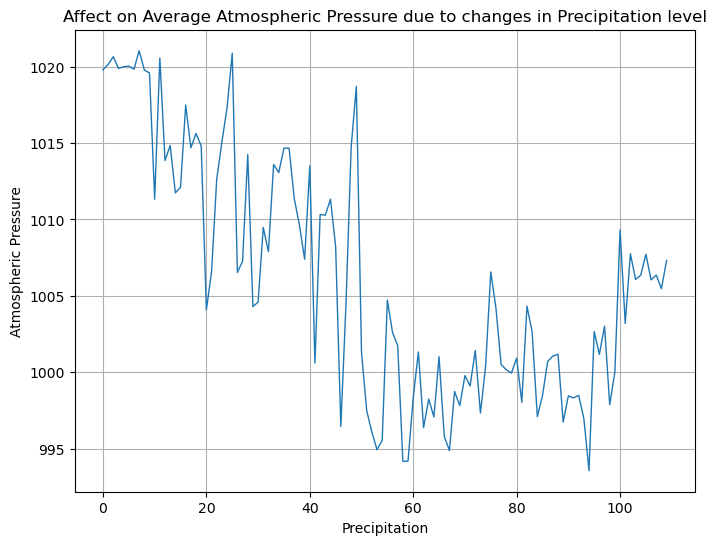

In [22]:
PA=df.groupby('Precipitation (%)')['Atmospheric Pressure'].mean()
PA.plot(kind='line',figsize=(8,6),lw=1)
plt.grid(True)
plt.xlabel('Precipitation')
plt.ylabel('Atmospheric Pressure')
plt.title('Affect on Average Atmospheric Pressure due to changes in Precipitation level')

### Visualizations of correlation between factors

Text(0.5, 1.0, 'Correlation between different numerical factors')

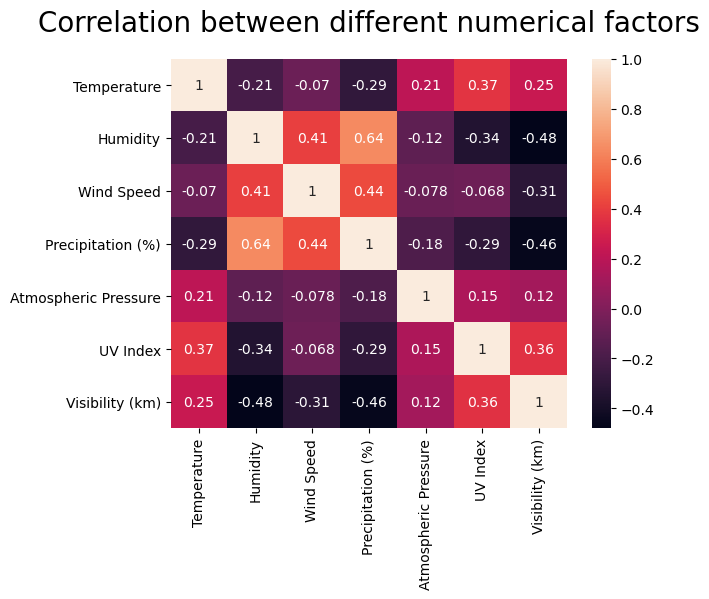

In [23]:
plt.plot(figsize=(8,8),dpi=200)
sns.heatmap(data=df.corr(),annot = True)
plt.title('Correlation between different numerical factors',fontsize=20,pad=20)


Text(0, 0.5, 'Correlation Coeffecient')

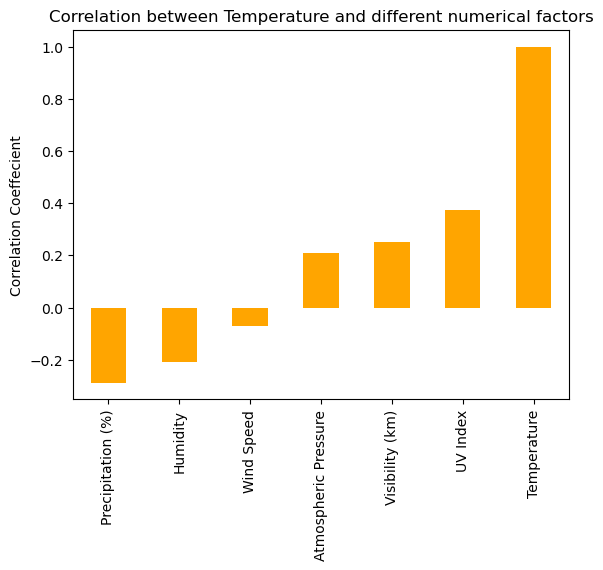

In [24]:
temp_corr = df.corr()['Temperature'].sort_values()
temp_corr.plot(kind='bar',color='orange')
plt.title('Correlation between Temperature and different numerical factors')
plt.ylabel('Correlation Coeffecient')


# Data Processing

In [25]:
X=df.drop('Weather Type',axis=1)

In [26]:
X = pd.get_dummies(X,drop_first=True)

In [27]:
y=df['Weather Type']

### We splitted the Target Variable from the rest of the independent variables and now we split them into trainning and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###  We scaled the entire X set because Logistic Regression is sensitive to the scale of the data and it enhances the performance of the machine learning algorithm

In [29]:
scaler = StandardScaler()

In [30]:
scaled_X_train = scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.transform(X_test)

# 1. LOGISTIC REGRESSION

### Setting up our Logistic Regression Model with certain parameters

In [32]:
log_model = LogisticRegression(solver='saga',multi_class = 'ovr',max_iter = 500)

### Finding the best hyperparameters with the help of Grid Search Cross Validation

In [33]:
penalty = ['l1','l2','elasticnet']

In [34]:
l1_ratio = np.linspace(0,1,5)

In [35]:
C = np.logspace(0,10,5)

In [36]:
param_grid = {'penalty':penalty,
             'l1_ratio':l1_ratio,
             'C':C}

In [37]:
grid_model = GridSearchCV(log_model,param_grid = param_grid)

### Fitting our model and finding the best hyperparameters

In [38]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

### These are our best hyperparameters 

In [39]:
grid_model.best_params_

{'C': 316.22776601683796, 'l1_ratio': 0.0, 'penalty': 'l1'}

### Prediciting the Target labels based on our model

In [40]:
y_grid_pred = grid_model.predict(scaled_X_test)

In [41]:
accuracy_score(y_test,y_grid_pred)

0.854040404040404

In [42]:
print(classification_report(y_test,y_grid_pred))

              precision    recall  f1-score   support

      Cloudy       0.78      0.82      0.80       954
       Rainy       0.83      0.85      0.84       986
       Snowy       0.88      0.94      0.91      1020
       Sunny       0.94      0.80      0.87      1000

    accuracy                           0.85      3960
   macro avg       0.86      0.85      0.85      3960
weighted avg       0.86      0.85      0.85      3960



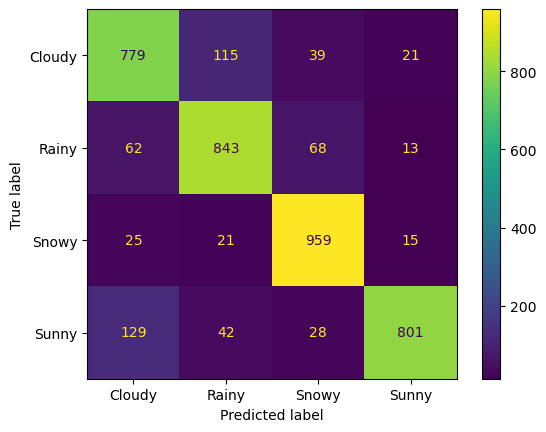

In [43]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

## So we get an accuracy score of 85.4% meaning 85 out of 100 times we would be correct in predicting the correct outcome

# 2. DECISION TREE LEARNING

In [44]:
decision_tree_model = DecisionTreeClassifier()

In [45]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
decision_tree_pred= decision_tree_model.predict(X_test)

### Finding out the most important feature

In [47]:
imp_feats = pd.DataFrame(index=X.columns,data=decision_tree_model.feature_importances_,columns=['Feature Importances']).sort_values('Feature Importances')

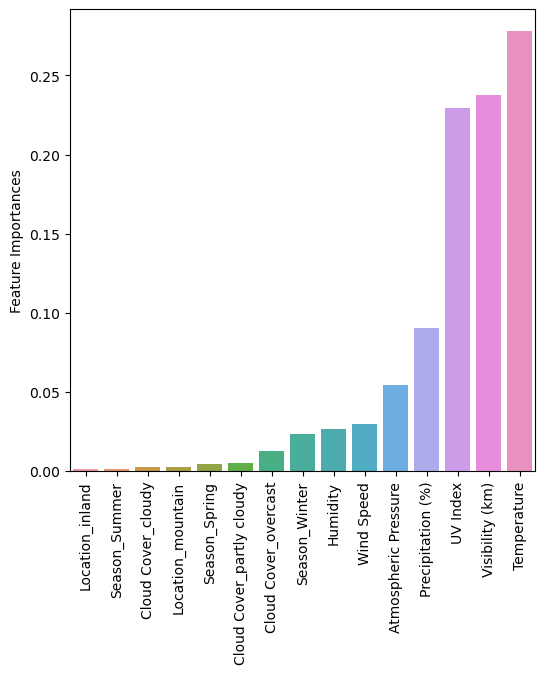

In [48]:
plt.figure(figsize=(6,6))
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feature Importances')
plt.xticks(rotation=90);

### Temperature is the most important feature in this model

In [49]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

      Cloudy       0.90      0.89      0.89       954
       Rainy       0.91      0.92      0.91       986
       Snowy       0.93      0.93      0.93      1020
       Sunny       0.92      0.91      0.91      1000

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



In [50]:
accuracy_score(y_test,decision_tree_pred).round(2)

0.91

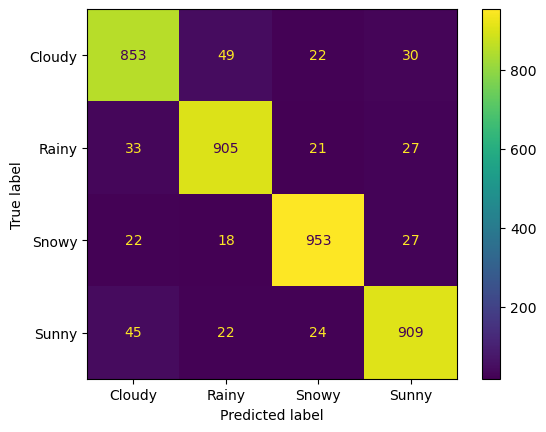

In [51]:
plot_confusion_matrix(decision_tree_model,X_test,y_test)

## So just with default parameters we are getting an accuracy score of 91 %

# 3. RANDOM FOREST CLASSIFIER

In [52]:
rfc_model = RandomForestClassifier()

In [53]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rfc_preds = rfc_model.predict(X_test)

In [55]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

      Cloudy       0.88      0.90      0.89       954
       Rainy       0.91      0.93      0.92       986
       Snowy       0.95      0.93      0.94      1020
       Sunny       0.93      0.90      0.92      1000

    accuracy                           0.92      3960
   macro avg       0.92      0.92      0.92      3960
weighted avg       0.92      0.92      0.92      3960



In [56]:
accuracy_score(y_test,rfc_preds).round(2)

0.92

## With default parameters we are having 92 percent accuracy, let us perform Gridsearch over other parameters to check if there is any scope for improvement

### Performing Grid Search for the best hyper parameters

In [57]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [58]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [59]:
rfc_model=RandomForestClassifier()

In [60]:
grid_rfc_model = GridSearchCV(rfc_model,param_grid)

In [61]:
grid_rfc_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [62]:
grid_rfc_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [63]:
y_grid_rfc_pred = grid_rfc_model.predict(X_test)

In [64]:
accuracy_score(y_test,y_grid_rfc_pred).round(2)

0.92

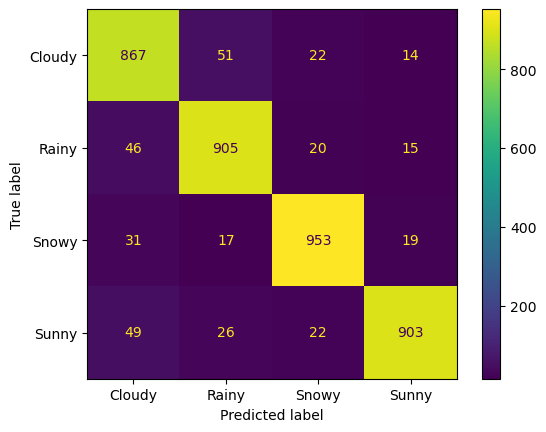

In [65]:
plot_confusion_matrix(grid_rfc_model,X_test,y_test)

## With Random Forest Classification we are having 92 % accuracy

# 4. SUPPORT VECTOR CLASSIFIER

### Performing Grid Search Cross Validation for the best hyper parameters

In [66]:
svm_model = SVC()
param_grid = {'C':[0.000001,0.01,0.1,1],
              'kernel':['linear','rbf']}
svm_grid=GridSearchCV(svm_model,param_grid)
svm_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-06, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [67]:
svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [68]:
svm_y_preds = svm_grid.predict(scaled_X_test)

In [77]:
accuracy_score(y_test,svm_y_preds).round(2)

0.91

In [78]:
print(classification_report(y_test,svm_y_preds))

              precision    recall  f1-score   support

      Cloudy       0.85      0.89      0.87       954
       Rainy       0.89      0.91      0.90       986
       Snowy       0.94      0.94      0.94      1020
       Sunny       0.95      0.88      0.91      1000

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



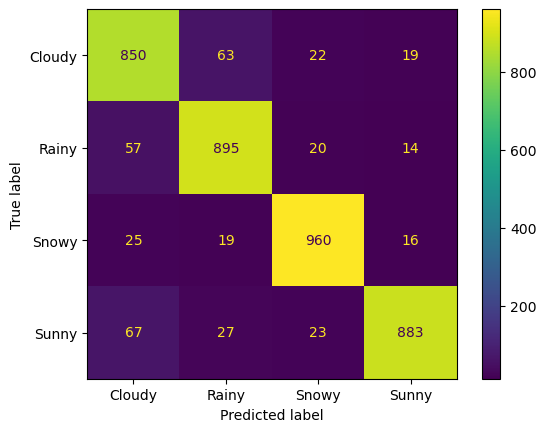

In [79]:
plot_confusion_matrix(svm_grid,scaled_X_test,y_test)

## Let us test our model for one random instance

In [70]:
X_test[:1]

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
12182,13.0,71,9.0,41.0,1019.47,1,8.0,0,0,1,0,1,0,1,0


In [71]:
testing_set = [[13.0,71,9.0,41.0,1019.47,1,8.0,0,0,1,0,1,0,1,0]]
testing_set

[[13.0, 71, 9.0, 41.0, 1019.47, 1, 8.0, 0, 0, 1, 0, 1, 0, 1, 0]]

###  Given these set of information our models are predicting it to be a cloudy weather type

In [72]:
grid_rfc_model.predict(testing_set)

array(['Cloudy'], dtype=object)

In [80]:
grid_model.predict(testing_set)

array(['Cloudy'], dtype=object)

In [82]:
decision_tree_model.predict(testing_set)

array(['Cloudy'], dtype=object)

In [74]:
df.iloc[12182]

Temperature                        13
Humidity                           71
Wind Speed                          9
Precipitation (%)                  41
Cloud Cover             partly cloudy
Atmospheric Pressure          1019.47
UV Index                            1
Season                         Summer
Visibility (km)                     8
Location                       inland
Weather Type                   Cloudy
Name: 12182, dtype: object

### !! From our dataset we can see it is indeed cloudy 